In [1]:
# Import Librabries

import numpy as np
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
os.getcwd()

'c:\\Users\\HP\\Desktop\\Machine Learning Programing with prajwal'

In [3]:
# Load Data Set
os.chdir('C:\\Users\\HP\\Downloads\\Batch 93 Day36\\')

In [4]:
df=pd.read_csv('Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
# Remove the String Columns and Dependent Variable to create a Co-relation matrix 

dfcorr=df.drop('Geography',axis=1).drop('Gender',axis=1).drop('Exited',axis=1)
dfcorr=dfcorr.iloc[:,3:]
display(dfcorr)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64
9996,516,35,10,57369.61,1,1,1,101699.77
9997,709,36,7,0.00,1,0,1,42085.58
9998,772,42,3,75075.31,2,1,0,92888.52


In [6]:
# Display Co-relation matrix

display(dfcorr.corr())

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000


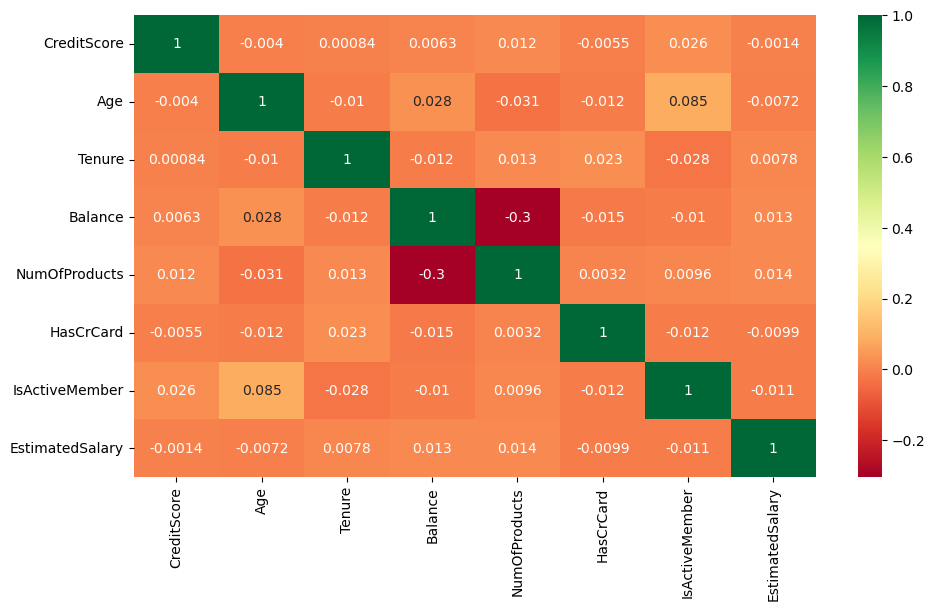

In [7]:
# Plot Heat Map

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(11,6))
sns.heatmap(dfcorr.corr(),annot=True,cmap='RdYlGn')
plt.show()

In [8]:
# Create X

X=df.iloc[:,3:13]
display(X)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [9]:
# Create Y

Y=df.iloc[:,13]
display(Y)

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [10]:
dfcorr.shape

(10000, 8)

In [12]:
# Check Distinct Gaography Values before onehot encoding

print(X['Geography'].value_counts())

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64


In [14]:
# One Hot encoding,store one hot encoded values in variable geography

geography=pd.get_dummies(X['Geography'],drop_first=True,dtype=int)
geography

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [15]:
geography=pd.get_dummies(X['Geography'],dtype=int)
geography

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1
...,...,...,...
9995,1,0,0
9996,1,0,0
9997,1,0,0
9998,0,1,0


In [16]:
# Drop Geography and Gender Columns from X

gender=pd.get_dummies(X['Gender'],dtype=int)
gender

,Female,Male
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
9995,0,1
9996,0,1
9997,1,0
9998,0,1


In [17]:
gender=pd.get_dummies(X['Gender'],drop_first=True,dtype=int)
gender

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [18]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [19]:
'''Prajwal,we did the one hot encoding so, i can remove this two columns (Geography and Gender)'''

# Drop Geography and Gender Columns fro X

X=X.drop(['Geography','Gender'],axis=1)
display(X)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64
9996,516,35,10,57369.61,1,1,1,101699.77
9997,709,36,7,0.00,1,0,1,42085.58
9998,772,42,3,75075.31,2,1,0,92888.52


In [20]:
# Concatenate Gender and Geography (One hot encoded data set)columns with X

X=pd.concat([X,geography,gender],axis=1)
display(X)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,1,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,1,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,0,1,0,1


In [21]:
# Different Parameters for XG Boost

params={
'learning_rate'   :[0.05,0.10,0.15,0.20,0.25,0.30],
'max_depth'       :[3,4,5,6,8,10,12,15],
'min_child_weight':[1,3,5,7],
'gamma'           :[0.0,0.1,0.2,0.3,0.4],
'colsample_bytree':[0.3,0.4,0.5,0.6]
} 

In [22]:
6*8*4*5*4

3840

In [33]:
# Create XG Boost Classifier

from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
import xgboost
classifier=xgboost.XGBClassifier()
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=100,scoring='roc_auc',n_jobs=-1,cv=10,verbose=3)

In [34]:
# Display all Scoring Values
from sklearn import metrics
display(", ".join(metrics.get_scorer_names()))


'accuracy, adjusted_mutual_info_score, adjusted_rand_score, average_precision, balanced_accuracy, completeness_score, d2_absolute_error_score, explained_variance, f1, f1_macro, f1_micro, f1_samples, f1_weighted, fowlkes_mallows_score, homogeneity_score, jaccard, jaccard_macro, jaccard_micro, jaccard_samples, jaccard_weighted, matthews_corrcoef, max_error, mutual_info_score, neg_brier_score, neg_log_loss, neg_mean_absolute_error, neg_mean_absolute_percentage_error, neg_mean_gamma_deviance, neg_mean_poisson_deviance, neg_mean_squared_error, neg_mean_squared_log_error, neg_median_absolute_error, neg_negative_likelihood_ratio, neg_root_mean_squared_error, neg_root_mean_squared_log_error, normalized_mutual_info_score, positive_likelihood_ratio, precision, precision_macro, precision_micro, precision_samples, precision_weighted, r2, rand_score, recall, recall_macro, recall_micro, recall_samples, recall_weighted, roc_auc, roc_auc_ovo, roc_auc_ovo_weighted, roc_auc_ovr, roc_auc_ovr_weighted, to

In [41]:
# Function Timer used to check execution duration


def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [ ]:
from datetime import datetime
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X,Y)
timer(start_time) # timing ends here for "start_time" variable

In [ ]:
# Display X Data set

display(X.head())

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [43]:

#Create XG Boost with best paraments.

classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None,use_label_encoder=False )

In [44]:
#Cross Validation 

from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,X,Y,cv=10)

In [45]:
# Print result from each cross validation 
print (score) 

[0.82  0.818 0.827 0.811 0.822 0.817 0.819 0.825 0.821 0.817]


In [46]:
# Print Mean and standard deviation 

print (score.mean())
print (score.std())


0.8196999999999999
0.004267317658670355


In [47]:
# Create Model 

classifier = classifier.fit(X,Y)
print (classifier)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.3,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.1, gpu_id=-1,
              grow_policy=None, importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=0,
              max_depth=5, max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints='()', multi_strategy=None, n_estimators=100,
              n_jobs=4, num_parallel_tree=1, ...)


In [48]:
# Prediction  

y_pred = classifier.predict(X)
display (y_pred)


array([0, 0, 1, ..., 0, 0, 0])

In [49]:
# Accuracy Score 

from sklearn.metrics import accuracy_score
print (accuracy_score(Y,y_pred))

0.8197


In [50]:

# Create XG Boost in the Normal Way 
# Train Test Split 

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size= 0.2)
print (X.shape)
print (Y.shape)
print (x_train.shape)
print (y_train.shape)
print (x_test.shape)
print (y_test.shape)

(10000, 12)
(10000,)
(8000, 12)
(8000,)
(2000, 12)
(2000,)


In [51]:
# Create Model  

classifier=xgboost.XGBClassifier()
classifier.fit(x_train,y_train)
print (classifier)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


In [52]:
# Prediction for Test Data Set
y_pred = classifier.predict (x_test)
print (y_pred)


[0 0 0 ... 0 0 0]


In [54]:
# Accuracy Score 
from sklearn.metrics import accuracy_score
print (accuracy_score (y_test,y_pred))

0.84


In [55]:

# Classification Report 

from sklearn.metrics import classification_report
print(classification_report (y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90      1583
           1       0.66      0.48      0.55       417

    accuracy                           0.84      2000
   macro avg       0.77      0.71      0.73      2000
weighted avg       0.83      0.84      0.83      2000



In [56]:
#  Confusion Matrix 
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix (y_test,y_pred)
print (cm)


[[1481  102]
 [ 218  199]]


In [58]:
(1482+199)/2000

0.8405

In [57]:
print(len(y_test))

2000


In [61]:

'''Create XG Boost in the Normal Way 
Train Test Split '''

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size= 0.2)
print (X.shape)
print (Y.shape)
print (x_train.shape)
print (y_train.shape)
print (x_test.shape)
print (y_test.shape)

'''Create Model'''  

classifier=xgboost.XGBClassifier()
classifier.fit(x_train,y_train)
print (classifier)

'''Prediction for Test Data Set'''

y_pred = classifier.predict (x_test)
print (y_pred)

'''Accuracy Score'''
 
from sklearn.metrics import accuracy_score
print (accuracy_score (y_test,y_pred))

'''Classification Report'''

from sklearn.metrics import classification_report
print(classification_report (y_test,y_pred))
 
'''Confusion Matrix'''
 
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix (y_test,y_pred)
print (cm)




(10000, 12)
(10000,)
(8000, 12)
(8000,)
(2000, 12)
(2000,)
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
[0 0 0 ... 1 0 0]
0.8435
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      1553
           1       0.72      0.49      0.59      

In [62]:
'''Ok Prajwal Ghotkar 😄'''

'Ok Prajwal Ghotkar 😄'